## Trading

For a given date, $t$, if our model predicts the Close price at $t+1$ to be higher than the Open of $t+1$, we will buy at the $t+1$ Open price, and sell at the observed Close price on $t+1$. Conversly, if our model predicts the Close price at $t+1$ to be lower than the Open of $t+1$, we will sell at the $t+1$ Open price, and buy back at the observed Closed price on $t+1$. 

Hence, we do not hold a position overnight, and buy/sell at the Open and Close of each trading day.

In [49]:
def trade(df, preds, verbose=True):
    res_df = df.loc[preds.index[0]:preds.index[-1]][["Open", "Close", "Close Forecast"]]
    res_df["Prediction"] = preds

    pnl = 0

    for i in range(1, len(res_df)):
        today = res_df.iloc[i]
        yesterday = res_df.iloc[i-1]
        action = ""
        daily_pnl = 0
        
        # If prediction for Close price at t+1 (today's Close Forecast) is higher than Open at t+1 (today's Open), buy then sell
        if yesterday['Prediction'] > today['Open']:
            action = "Buy"
            daily_pnl = today['Close'] - today['Open']  # Buy at Open, sell at Close
            pnl += daily_pnl
        # Else, sell then buy
        elif yesterday['Prediction'] < today['Open']:
            action = "Sell"
            daily_pnl = today['Open'] - today['Close']  # Sell at Open, buy at Close
            pnl += daily_pnl
        
        if verbose:
            print(f"{today.name.strftime('%Y-%m-%d'):10s}: {action:4s} @ {today['Open']:8.2f} | Close @ {today['Close']:8.2f} | Day P/L {daily_pnl:8.2f} | Cum. P/L: {pnl:8.2f}")

    return pnl

def trade_buy_hold(data, split=0.9):
    test_split = int(len(data)*split)
    df = data[test_split:]
    buy = df.iloc[0]['Open']
    sell = df.iloc[-1]['Close']
    pnl = sell - buy
    print(f"{df.index[0].strftime('%Y-%m-%d'):10s}: Buy @ {buy:8.2f}")
    print(f"{df.index[-1].strftime('%Y-%m-%d'):10s}: Sell @ {sell:8.2f}")
    print(f"PNL: {pnl}")
    return pnl

def trade_sell_hold(data, split=0.9):
    test_split = int(len(data)*split)
    df = data[test_split:]
    sell = df.iloc[0]['Open']
    buy = df.iloc[-1]['Close']
    pnl = sell - buy
    print(f"{df.index[0].strftime('%Y-%m-%d'):10s}: Buy @ {buy:8.2f}")
    print(f"{df.index[-1].strftime('%Y-%m-%d'):10s}: Sell @ {sell:8.2f}")
    print(f"PNL: {pnl}")
    return pnl

In [50]:
from src.misc import load_processed_dataset, evaluate

In [51]:
df = load_processed_dataset("aapl", "2018-01-01", "2023-01-1")

In [52]:
trade_buy_hold(df)

2022-07-05: Buy @   136.41
2022-12-30: Sell @   129.04
PNL: -7.370399947510634


-7.370399947510634

In [53]:
trade_sell_hold(df)

2022-07-05: Buy @   129.04
2022-12-30: Sell @   136.41
PNL: 7.370399947510634


7.370399947510634

Baseline model

R^2: 0.9052672443982556
MSE: 10.864161256797766
RMSE: 3.2960827138889837
MAE: 2.503579518151662
MAPE: 1.7006109697709257


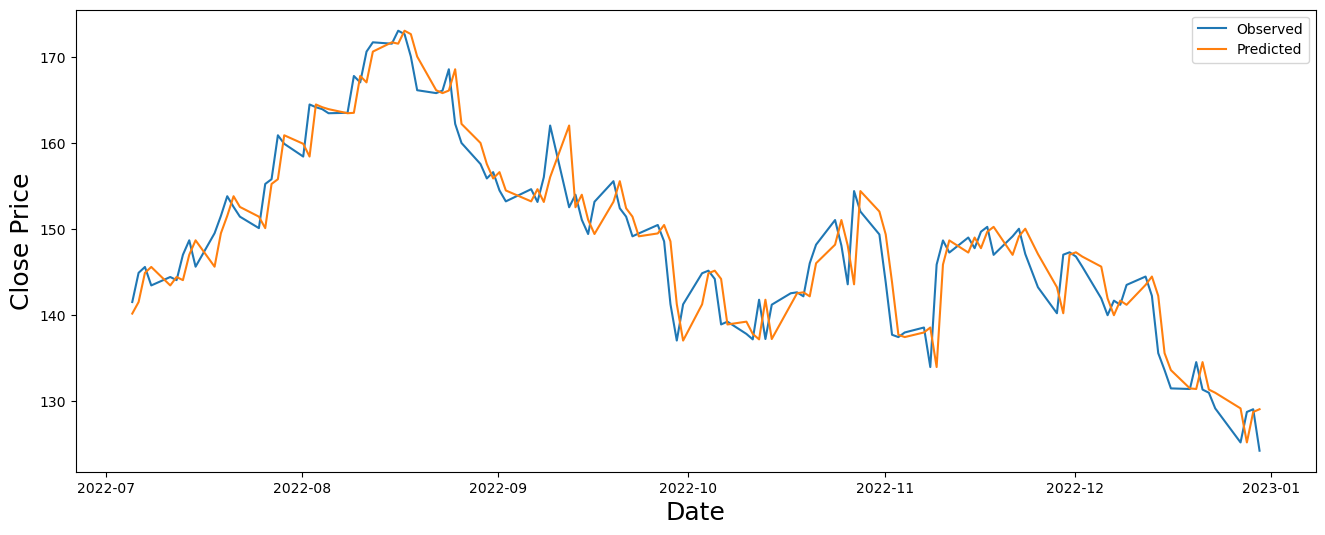

PNL: 3.8707565536124946


In [54]:
import src.models.Baseline.evaluate 
preds, obs = src.models.Baseline.evaluate.eval()
pnl = trade(df, preds, verbose=False)
print(f"PNL: {pnl}")

ARIMA model

/Users/simon/Documents/II/Dissertation/src/models/ARIMA/train.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y_test[t])


R^2: 0.8265897663715707
MSE: 19.887067886406328
RMSE: 4.4594918865725415
MAE: 2.767178890620996
MAPE: 1.8879151079080534


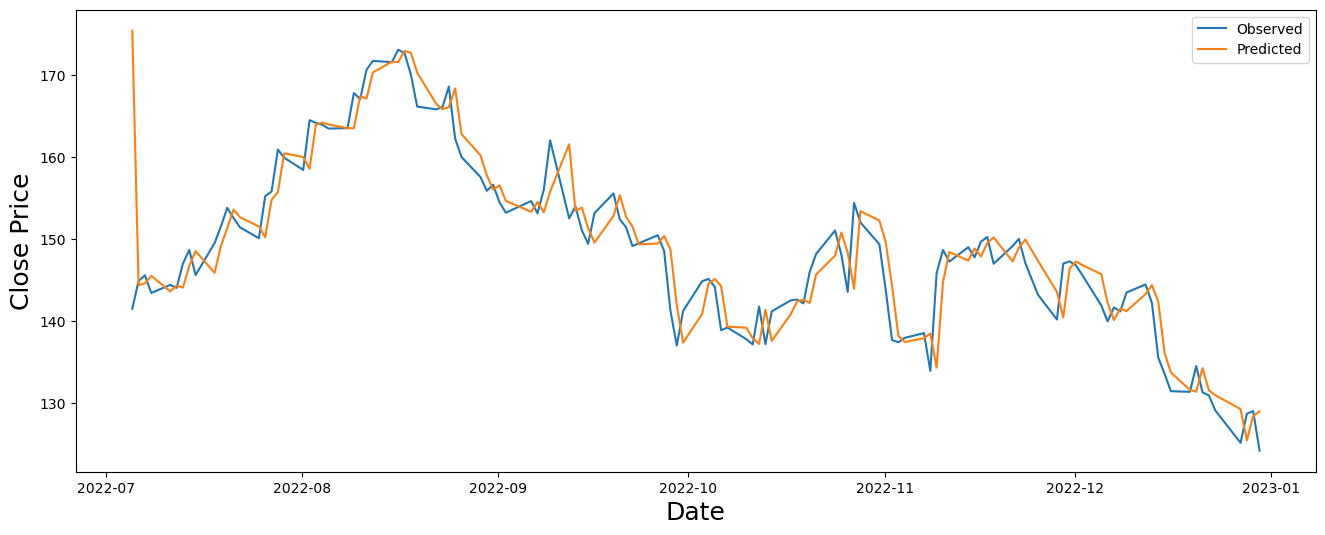

Date
2022-07-05 04:00:00    175.397385
2022-07-06 04:00:00    144.390190
2022-07-07 04:00:00    144.606157
2022-07-08 04:00:00    145.531851
2022-07-11 04:00:00    143.634308
                          ...    
2022-12-23 05:00:00    130.989100
2022-12-27 05:00:00    129.286362
2022-12-28 05:00:00    125.488191
2022-12-29 05:00:00    128.441208
2022-12-30 05:00:00    129.017790
Length: 126, dtype: float64
PNL: 13.259853746867378


In [57]:
import src.models.ARIMA.train 
preds, obs = src.models.ARIMA.train.train()
pnl = trade(df, preds, verbose=False)
print(f"PNL: {pnl}")

LSTM model

StockPriceLSTM(
  (lstm): LSTM(5, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
R^2: 0.3372125960800556
MSE: 30.587152442592746
RMSE: 5.530565291413957
MAE: 4.772167767660132
MAPE: 3.3948301126641365


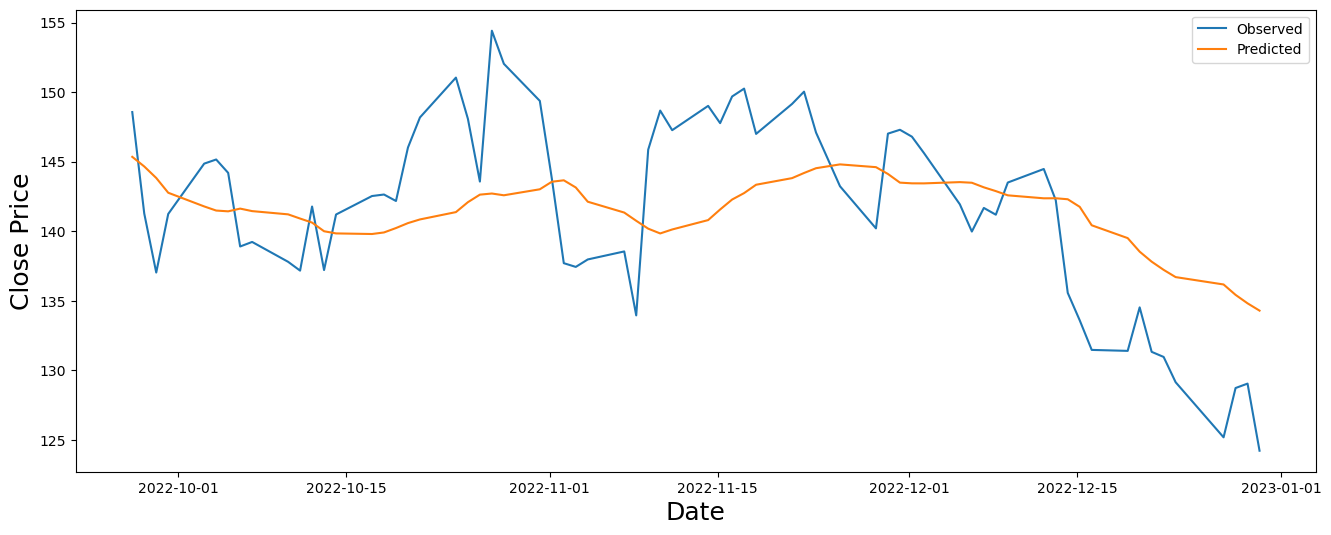

PNL: -13.041294649226757


In [58]:
import src.models.LSTM.evaluate 
import yaml

with open("/Users/simon/Documents/II/Dissertation/configs/lstm.yaml", 'r') as file:
    config = yaml.safe_load(file)

preds, obs = src.models.LSTM.evaluate.eval(
    config["data"]["features"],
    config["data"]["sequence_len"],
    config['mlflow']['experiment_name']
)
pnl = trade(df, preds, verbose=False)
print(f"PNL: {pnl}")

XGBoost

[0]	validation_0-rmse:89.98871	validation_1-rmse:147.13310
[100]	validation_0-rmse:33.42142	validation_1-rmse:55.46708


/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [06:54:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1705650237050/work/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:12.50360	validation_1-rmse:23.09430
[300]	validation_0-rmse:4.84229	validation_1-rmse:11.18646
[400]	validation_0-rmse:2.20800	validation_1-rmse:7.64142
[500]	validation_0-rmse:1.45754	validation_1-rmse:6.47484
[600]	validation_0-rmse:1.26283	validation_1-rmse:6.09931
[700]	validation_0-rmse:1.18577	validation_1-rmse:5.94597
[800]	validation_0-rmse:1.14578	validation_1-rmse:5.82699
[900]	validation_0-rmse:1.11957	validation_1-rmse:5.79148
[999]	validation_0-rmse:1.09349	validation_1-rmse:5.76807


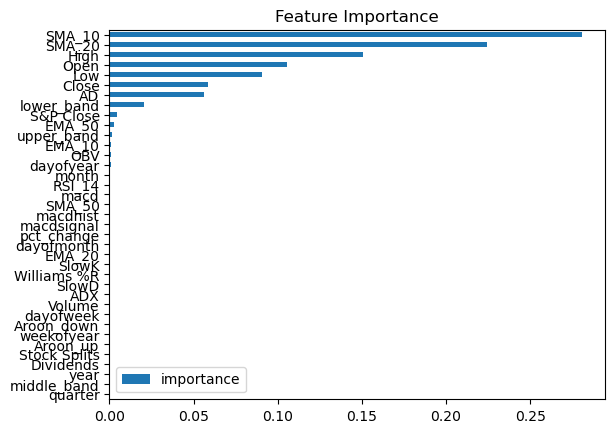

R^2: 0.70988863758846
MSE: 33.27061061032018
RMSE: 5.76806818703803
MAE: 4.504222264365544
MAPE: 2.9391238430211293


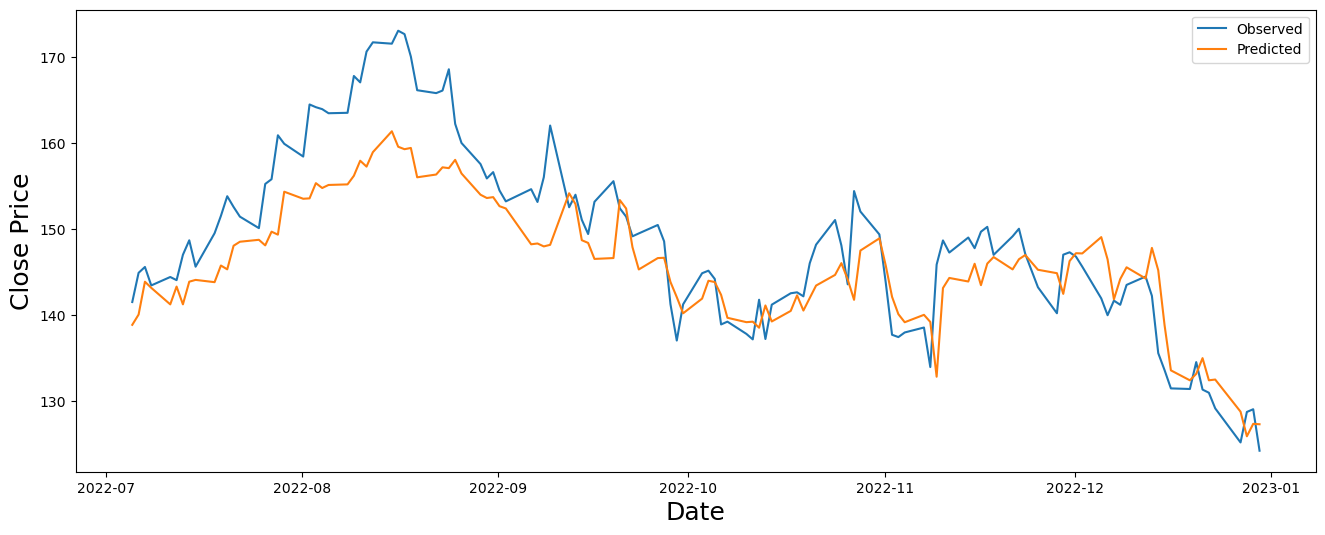

PNL: 6.050771261403952


In [60]:
import src.models.XGBoost.train
preds, obs = src.models.XGBoost.train.train()
pnl = trade(df, preds, verbose=False)
print(f"PNL: {pnl}")